In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.max(), x_test.max(), x_train.min(), x_test.min())

170508288/170498071 [==============================] - 4s 0us/step
255 255 0 0


In [3]:
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

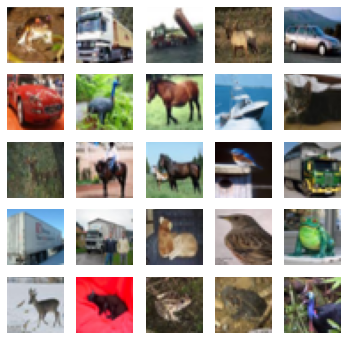

In [4]:
plt.figure(figsize = (6, 6))

for index in range(25):

  plt.subplot(5, 5, index+1)
  plt.imshow(x_train[index])
  plt.axis('off')

plt.show()

In [5]:
x_train.shape

(50000, 32, 32, 3)

C-C-P-C-C-P-C-C-P-C-C-P-D

In [35]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'SAME', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'SAME'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'SAME'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'SAME'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'SAME'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'SAME'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation = 'tanh'))
model.add(Dense(64, activation = 'tanh'))

model.add(Dense(10, activation = 'softmax'))

In [36]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(0.001), metrics = ['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_38 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [37]:
from datetime import datetime

start = datetime.now()

hist = model.fit(x_train.reshape(-1, 32, 32, 3), y_train, batch_size = 50, epochs = 50, validation_split = 0.2)

end = datetime.now()

print('elapsed time is ', end - start)

Epoch 1/50
800/800 [==============================] - 18s 21ms/step - loss: 1.6032 - accuracy: 0.4086 - val_loss: 1.2787 - val_accuracy: 0.5320
Epoch 2/50
800/800 [==============================] - 16s 20ms/step - loss: 1.1488 - accuracy: 0.5864 - val_loss: 0.9720 - val_accuracy: 0.6560
Epoch 3/50
800/800 [==============================] - 16s 21ms/step - loss: 0.9819 - accuracy: 0.6503 - val_loss: 0.9813 - val_accuracy: 0.6595
Epoch 4/50
800/800 [==============================] - 16s 21ms/step - loss: 0.8716 - accuracy: 0.6924 - val_loss: 0.8343 - val_accuracy: 0.7110
Epoch 5/50
800/800 [==============================] - 16s 20ms/step - loss: 0.7947 - accuracy: 0.7225 - val_loss: 0.7618 - val_accuracy: 0.7337
Epoch 6/50
800/800 [==============================] - 16s 21ms/step - loss: 0.7357 - accuracy: 0.7409 - val_loss: 0.7425 - val_accuracy: 0.7487
Epoch 7/50
800/800 [==============================] - 16s 20ms/step - loss: 0.6817 - accuracy: 0.7613 - val_loss: 0.7355 - val_accuracy:

In [38]:
model.evaluate(x_test.reshape(-1, 32, 32, 3), y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.0885 - accuracy: 0.6286


[1.0884966850280762, 0.628600001335144]

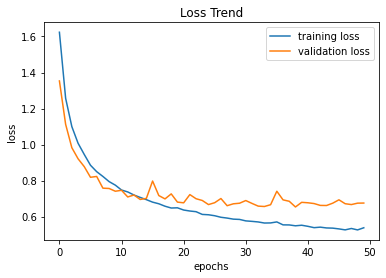

In [16]:
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(hist.history['loss'], label = 'training loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')

plt.legend(loc = 'best')
plt.show()

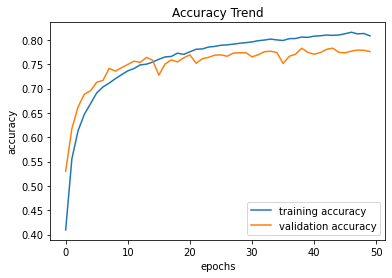

In [17]:
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.plot(hist.history['accuracy'], label = 'training accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation accuracy')

plt.legend(loc = 'best')
plt.show()